# Project Plan
- Project Plan
- Project Description
- Data Load
- Data Inspection
- Data Preprocessing
- Exploratory Analysis
- Testing out null hypothesis
  - People outside of Moscow spend less on cell service (alpha = 0.05)
  - Young people spend more people on cell service (alpha = 0.0.5)

# Project Description
We are working for the cell service provider, which offers two packages. <br/>
Our task is to analyse clients behavior and determine which package is more profitable for the company.

Package - "Smart"
- Monthly charge $\$$11
- Included
  - 500 min of calls
  - 50 texts
  - 15 gb of internet
- Overage
  - $\$$0.06/min
  - $\$$0.06/text
  - $\$$4/gb

Package - "Ultra"
- Monthly charge $\$$39
- Included
  - 3000 min of calls
  - 1000 texts
  - 30 gb of internet
- Overage
  - $\$$0.02/min
  - $\$$0.02/text
  - $\$$3/gb

(Service useage rounds up - 1025 MB -> 2 GB, 1 sec -> 1 min)


# Data Load

In [87]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
path_datasets = os.path.join(os.getcwd(), 'datasets')

In [3]:
df_users = pd.read_csv(os.path.join(path_datasets, 'users.csv'))
df_tariffs = pd.read_csv(os.path.join(path_datasets, 'tariffs.csv'))
df_messages = pd.read_csv(os.path.join(path_datasets, 'messages.csv'))
df_internet = pd.read_csv(os.path.join(path_datasets, 'internet.csv'))
df_calls = pd.read_csv(os.path.join(path_datasets, 'calls.csv'))

In [4]:
df_users_raw = df_users.copy()
df_calls_raw = df_calls.copy()
df_messages_raw = df_messages.copy()
df_internet_raw = df_internet.copy()

# Data Inspection

In [5]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
df_users.head(3)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


<div style="background:DeepSkyBlue;padding:2rem;">
    Columns - "churn_date", "reg_date" - can be converted to a proper data type. <br/>
    Column "churn_date" has only 38 values, which likely means NaNs are clients who are still using services.
</div>

In [7]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [8]:
df_tariffs.head(3)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<div style="background:DeepSkyBlue;padding:2rem;">
    This looks like a dimension table!
</div>

In [9]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [10]:
df_messages.head(3)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000


<div style="background:DeepSkyBlue;padding:2rem;">
    Looks like column "id" has column "user_id" encoded in it.
</div>

In [11]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [12]:
df_internet.head(3)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000


<div style="background:DeepSkyBlue;padding:2rem;">
    First column should be dropped. <br/>
    Column "session_date" can be converted to dt data type. <br/>
    Looks like column "id" has column "user_id" encoded in it.
</div>

In [13]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [14]:
df_calls.head(3)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000


<div style="background:DeepSkyBlue;padding:2rem;">
    Column "call_date" can be converted to dt data type. <br/>
    Looks like column "id" has column "user_id" encoded in it.
</div>

# Data Preprocessing

Columns' data types to fix:
- "reg_date" to datetime
- "churn_date" to datetime
- "session_date" to datetime
- "call_date" to datetime

In [15]:
df_users.reg_date = pd.to_datetime(df_users.reg_date, errors='coerce')
df_users.churn_date = pd.to_datetime(df_users.churn_date, errors='coerce')

In [16]:
df_messages.message_date = pd.to_datetime(df_messages.message_date, errors='coerce')

In [17]:
df_calls.call_date = pd.to_datetime(df_calls.call_date, errors='coerce')

In [18]:
df_internet.session_date = pd.to_datetime(df_internet.session_date, errors='coerce')

Drop df_internet's first column "Unnamed: 0"

In [19]:
df_internet = df_internet.drop(['Unnamed: 0'], axis=1)

<div style="background:DeepSkyBlue;padding:2rem;">
    There are three services that we need to track - call minutes, texts, data. <br/>
</div>

<div style="background:DeepSkyBlue;padding:2rem;">
    The correct to calculate charges is using registration date. <br/>
</div>

In [20]:
def calculate_period(start, current):
    out = current.dt.month - start.dt.month + 1
    out += (current.dt.year - start.dt.year) * 12
    out += current.dt.day > start.dt.day
    return out

<div style="background:DeepSkyBlue;padding:2rem;">
    Calculate call period. <br/>
</div>

In [21]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [22]:
df_calls = df_calls.merge(df_users[['reg_date', 'user_id', 'tariff']], how='left', on='user_id')

In [23]:
df_calls['period'] = calculate_period(df_calls.reg_date, df_calls.call_date)

<div style="background:DeepSkyBlue;padding:2rem;">
    Round up call minutes. <br/>
</div>

In [24]:
df_calls.duration = np.ceil(df_calls.duration)

<div style="background:DeepSkyBlue;padding:2rem;">
    Calculate per period (monthly) useage. <br/>
</div>

In [25]:
df_calls = df_calls[['user_id', 'period', 'duration', 'tariff']].groupby(['user_id', 'period'])\
            .agg({'duration':'sum', 'tariff':'min'})

<div style="background:DeepSkyBlue;padding:2rem;">
    Use user's package to calculate costs. <br/>
</div>

In [26]:
def call_costs(row):
    tariff = row.tariff
    used_minutes = row.duration
    
    tariff_index = df_tariffs[df_tariffs.tariff_name == tariff].index[0]
    
    # extract included minutes
    minutes_included = df_tariffs.iloc[tariff_index].minutes_included
    # extract cost of extra minutes
    rub_per_minute = df_tariffs.iloc[tariff_index].rub_per_minute
    
    used_minutes -= used_minutes if minutes_included > used_minutes else minutes_included
    return used_minutes * rub_per_minute

In [27]:
df_calls['costs_calls'] = df_calls.apply(lambda row: call_costs(row), axis=1)

In [28]:
df_calls.head()

duration tariff  costs_calls
user_id period                              
1000    1            0.0  ultra          0.0
        2          303.0  ultra          0.0
        3          287.0  ultra          0.0
        4          438.0  ultra          0.0
        5          466.0  ultra          0.0

<div style="background:DeepSkyBlue;padding:2rem;">
    When we will merge this with user dataset we will run aggregate function to calculate total costs. <br/>
</div>

<div style="background:DeepSkyBlue;padding:2rem;">
    Now we will generate periods for messages and calculate costs. <br/>
</div>

In [29]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [30]:
df_messages = df_messages.merge(df_users[['user_id', 'reg_date', 'tariff']], 
                                on='user_id', how='left')

In [31]:
df_messages['period'] = calculate_period(df_messages.reg_date, df_messages.message_date)

In [32]:
df_messages = df_messages[['user_id', 'period', 'id', 'tariff']]\
                .groupby(['user_id', 'period']).agg({'id':'count', 'tariff':'min'})

In [33]:
df_messages.head()

id tariff
user_id period           
1000    1        2  ultra
        2       65  ultra
        3       71  ultra
        4       79  ultra
        5       71  ultra

In [34]:
def messages_costs(row):
    tariff = row.tariff
    used_messages = row.id
    
    tariff_index = df_tariffs[df_tariffs.tariff_name == tariff].index[0]
    
    # extract included messages
    messages_included = df_tariffs.iloc[tariff_index].messages_included
    # extract cost of extra messages
    rub_per_message = df_tariffs.iloc[tariff_index].rub_per_message
    
    used_messages -= used_messages if messages_included > used_messages else messages_included
    return used_messages * rub_per_message

In [35]:
df_messages['costs_messages'] = df_messages.apply(lambda row: messages_costs(row), axis=1)

<div style="background:DeepSkyBlue;padding:2rem;">
    Now we will generate periods for data and calculate costs. <br/>
</div>

In [36]:
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [37]:
df_internet = df_internet.merge(df_users[['user_id', 'reg_date', 'tariff']], on='user_id', how='left')

In [38]:
df_internet['period'] = calculate_period(df_internet['reg_date'], df_internet['session_date'])

In [39]:
df_internet = df_internet[['user_id', 'period', 'mb_used', 'tariff']]\
                .groupby(['user_id', 'period']).agg({'mb_used':'sum', 'tariff':'min'})

In [40]:
def internet_costs(row):
    tariff = row.tariff
    used_mb = row.mb_used
    used_gb = used_mb / 1024 + used_mb % 1024 > 0
    
    tariff_index = df_tariffs[df_tariffs.tariff_name == tariff].index[0]
    
    # extract included gb
    gb_included = df_tariffs.iloc[tariff_index].mb_per_month_included / 1024
    # extract cost of extra gb
    rub_per_gb = df_tariffs.iloc[tariff_index].rub_per_gb
    
    used_gb -= used_gb if gb_included > used_gb else gb_included
    return used_gb * rub_per_gb

In [41]:
df_internet['costs_internet'] = df_internet.apply(lambda row: internet_costs(row), axis=1)

In [42]:
df_users = df_users.merge(df_internet[['costs_internet']].groupby('user_id').agg('sum'),
               how='left', on='user_id')

In [43]:
df_users = df_users.merge(df_messages[['costs_messages']].groupby('user_id').agg('sum'),
               how='left', on='user_id')

In [44]:
df_users = df_users.merge(df_calls[['costs_calls']].groupby('user_id')\
                          .agg('sum'), how='left', on='user_id')

In [45]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,costs_internet,costs_messages,costs_calls
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,0.0
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,0.0,NaN,0.0
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,0.0,0.0,0.0
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,0.0,0.0,0.0
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,0.0,0.0,0.0


<div style="background:DeepSkyBlue;padding:2rem;">
    We can fill out costs with 0 if there is no data. <br/>
    Now we can calculate lifetime monthly charges for the packages. <br/>
    To do that we will have to find the latest activity data to figure out the date of this dataset.
</div>

In [46]:
df_users[['costs_internet', 'costs_messages', 'costs_calls']] = \
    df_users[['costs_internet', 'costs_messages', 'costs_calls']].fillna(0)

In [47]:
pd.to_datetime(df_calls_raw.call_date, errors='coerce').max()

Timestamp('2018-12-31 00:00:00')

In [48]:
pd.to_datetime(df_messages_raw.message_date, errors='coerce').max()

Timestamp('2018-12-31 00:00:00')

In [49]:
pd.to_datetime(df_internet_raw.session_date, errors='coerce').max()

Timestamp('2018-12-31 00:00:00')

In [50]:
df_users.churn_date.max()

Timestamp('2018-12-30 00:00:00')

<div style="background:DeepSkyBlue;padding:2rem;">
    We can create a new column which will have the latest date or the date at which the client canceled their package and use that column to calculate monthly charges.
</div>

In [51]:
last_date = pd.Timestamp('2018-12-31T00')

In [52]:
df_users['last_date'] = df_users.churn_date

In [53]:
df_users.last_date = df_users.last_date.fillna(last_date)

In [54]:
df_users['periods'] = calculate_period(df_users.reg_date, df_users.last_date)

In [55]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,costs_internet,costs_messages,costs_calls,last_date,periods
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,0.0,2018-12-31,9
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,0.0,0.0,0.0,2018-12-31,3
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,0.0,0.0,0.0,2018-12-31,8
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,0.0,0.0,0.0,2018-12-31,6
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,0.0,0.0,0.0,2018-12-31,9


In [56]:
def calculate_monthly_costs(row):
    tariff = row.tariff
    tariff_index = df_tariffs[df_tariffs.tariff_name == tariff].index[0]
    
    # extract cost of extra gb
    rub_monthly_fee = df_tariffs.iloc[tariff_index].rub_monthly_fee
    
    return rub_monthly_fee * row.periods

In [57]:
df_users['costs_monthly'] = df_users.apply(lambda row: calculate_monthly_costs(row), axis=1)

In [58]:
df_users['costs_total'] = df_users.costs_monthly + df_users.costs_calls + \
                          df_users.costs_messages + df_users.costs_internet

# Exploratory Analysis

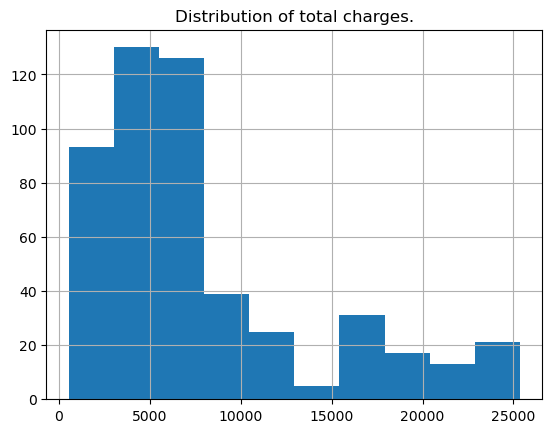

In [59]:
df_users.costs_total.hist()
plt.title('Distribution of total charges.')
plt.show()

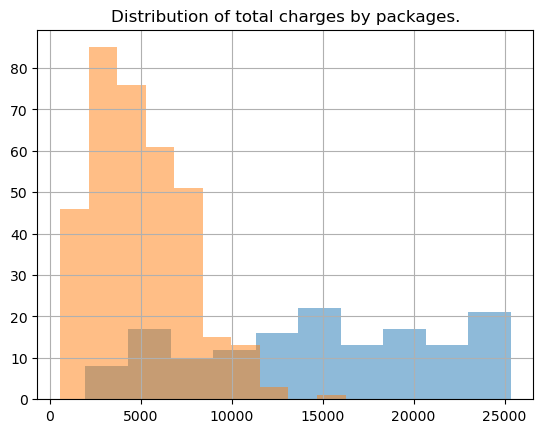

In [60]:
df_users[df_users.tariff == 'ultra'].costs_total.hist(alpha=0.5)
df_users[df_users.tariff == 'smart'].costs_total.hist(alpha=0.5)
plt.title('Distribution of total charges by packages.')
plt.show()

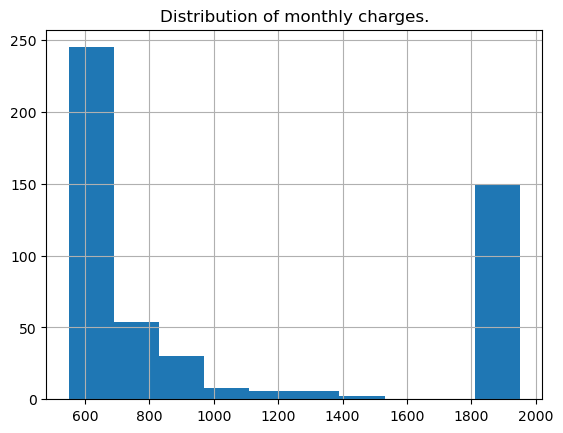

In [61]:
(df_users.costs_total / df_users.periods).hist()
plt.title('Distribution of monthly charges.')
plt.show()

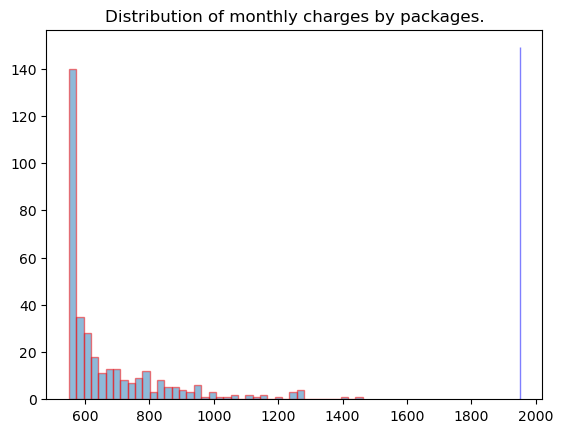

In [77]:
plt.hist(df_users[df_users.tariff == 'smart'].costs_total / 
         df_users[df_users.tariff == 'smart'].periods, alpha=0.5, edgecolor='red', bins=40)
plt.hist(df_users[df_users.tariff == 'ultra'].costs_total / 
         df_users[df_users.tariff == 'ultra'].periods, alpha=0.5, edgecolor='blue', bins=40)
plt.title('Distribution of monthly charges by packages.')
plt.show()

<div style="background:DeepSkyBlue;padding:2rem;">
    The blue spike on the right are the 'ultra' packages. <br/>
    This shows that customers with 'ultra' package never pay overage fees. <br/>
    From this graph we aslo see that 'smart' package customers never pay more than 'ultra' package users, which means on average they save more money. Which makes it a better deal!
</div>

<div style="background:DeepSkyBlue;padding:2rem;">
    Now we need to examine distribution of average monthly charges between the capital of Russian - Moscow and other cities.
</div>

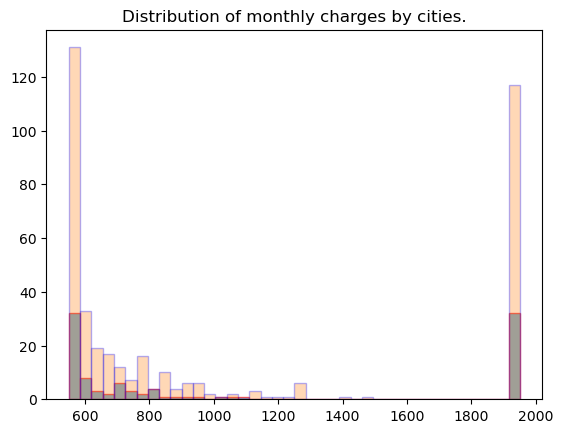

In [80]:
plt.hist(df_users[df_users.city == 'Москва'].costs_total / 
         df_users[df_users.city == 'Москва'].periods, alpha=0.6, edgecolor='red', bins=40)
plt.hist(df_users[df_users.city != 'Москва'].costs_total / 
         df_users[df_users.city != 'Москва'].periods, alpha=0.3, edgecolor='blue', bins=40)
plt.title('Distribution of monthly charges by cities.')
plt.show()

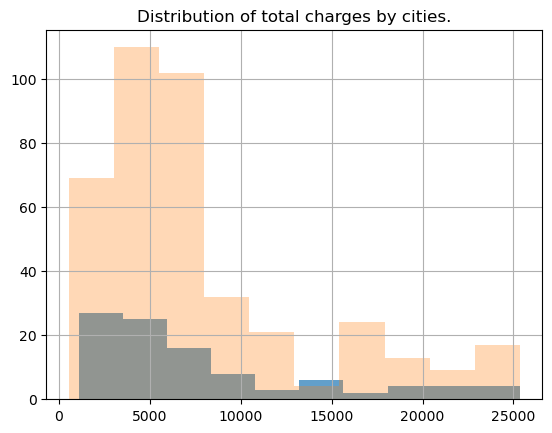

In [84]:
df_users[df_users.city == 'Москва'].costs_total.hist(alpha=0.7)
df_users[df_users.city != 'Москва'].costs_total.hist(alpha=0.3)
plt.title('Distribution of total charges by cities.')
plt.show()

<div style="background:DeepSkyBlue;padding:2rem;">
    From those two graphs we can see that people outside of Moscow tend to spend less, because there is a greater density in the lower area of the histogram.
</div>

In [86]:
print('Mean total charge in Moscow {:.2f}'.format(
    df_users[df_users.city == 'Москва'].costs_total.mean()))
print('Mean total charge outside of Moscow {:.2f}'.format(
    df_users[df_users.city != 'Москва'].costs_total.mean()))

Mean total charge in Moscow 8007.16
Mean total charge outside of Moscow 7773.39


In [136]:
city_p_value = st.ttest_ind(df_users[df_users.city == 'Москва'].costs_total.to_numpy(),
                            df_users[df_users.city != 'Москва'].costs_total.to_numpy()).pvalue

In [137]:
city_p_value

0.7335581538394657

In [125]:
from scipy.stats import norm, uniform, poisson

# Generate random numbers from a normal distribution
normal_numbers = norm.rvs(loc=0, scale=1, size=5)
print("Normal numbers:", normal_numbers)

# Generate random numbers from a uniform distribution
uniform_numbers = uniform.rvs(loc=0, scale=1, size=5)
print("Uniform numbers:", uniform_numbers)

# Generate random numbers from a Poisson distribution
poisson_numbers = poisson.rvs(mu=2, size=5)
print("Poisson numbers:", poisson_numbers)

Normal numbers: [ 0.02459752 -0.82470129  0.31801041  1.88016447  0.07243707]
Uniform numbers: [0.764609   0.00790928 0.41643803 0.37173612 0.73443468]
Poisson numbers: [3 2 2 2 2]


In [128]:
from scipy.stats import ttest_1samp

# Sample data
data = np.array([3.2, 2.9, 3.5, 2.6, 3.1, 2.8, 3.4, 3.0])

# Known population mean
population_mean = 3.0

# Perform one-sample t-test
t_statistic, p_value = ttest_1samp(data, population_mean)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 0.5852057359806528
P-value: 0.576779117473954
